# NUMPY (Numerical Python)

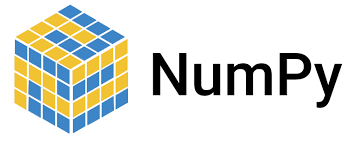

- Speed (well optimized c-code)
- Interoperable (Supports wide range of hardware and platforms)
- Texts, images, sounds,etc., can be represented as vectors and matrices. NumPy offers efficient ways to store and process the data. 
- Powerful N-Dimensional Arrays (vectorization, indexing, broadcasting. About 50 times faster than python lists.
- Numerical computing tools (random number generator, linear algebra, fft, etc.)

## List vs NumPy Array
- NumPy arrays are dense and homogenous which are needed for vector operations. 
- In NumPy array, types are static. Dynamic typing results in overhead to the interpreter. 

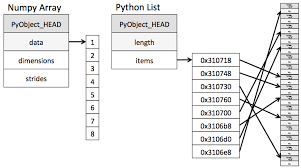

**Adding two lists**

In [1]:
# Adding two lists
a = [1, 2, 3]
b = [1, 1, 1]
print (a + b) 

[1, 2, 3, 1, 1, 1]


Two lists cannot be added without a loop. "+" joins the lists

**Adding two NumPy arrays**

In [2]:
import numpy as np
arr_a = np.array([1,2,3])
arr_b = np.array([1,1,1])
print(arr_a + arr_b)

[2 3 4]


Numpy arrays are added without the loop (vectorization)

## Performance  of  List vs NumPy Array

**Vector addition from lists**

In [3]:
# Add two lists
def add_two_vectors(x, y):
    z = []
    for i, j in zip(x, y):
        z.append(i + j)
    return z

a = range(10000)
b = range(10000)

t_p = %timeit -o add_two_vectors(a,b)

781 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Vector addition from NumPy arrays**

In [4]:
# Add two NumPy arrays
xa = np.array(a)
xb = np.array(b)
t_n = %timeit -o np.add(xa, xb) # Vector addition of two arrays

3.13 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


About 100x speedup with Numpy vectorization

In [5]:

abs(t_p.average - t_n.average)/abs(t_n.average)

248.72197088460896

[From Intel Website](https://software.intel.com/content/www/us/en/develop/articles/vectorization-a-key-tool-to-improve-performance-on-modern-cpus.html)

Why Vectorise?

Vectorization is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time. Modern CPUs provide direct support for vector operations where a single instruction is applied to multiple data (SIMD). For example, a CPU with a 512 bit register could hold 16 32- bit single precision doubles and do a single calculation.

16 times faster than executing a single instruction at a time. Combine this with threading and multi-core CPUs leads to orders of magnitude performance gains.

## NumPy's Universal Functions (ufuncs)
- Universal functions (ufuncs) are fast since they use vectorized operations. 
- ufuncs work with ndarray object.
- ufuncs can operate one or two inputs. 

### Example: Finding the inverse of a vector

### NumPy's vector approach

In [6]:
big_list = range(1,100000)
big_array = np.array(big_list)
print("Using UFUNCS")
t_n = %timeit -o np.divide(1.0,big_array) #  you can do 1.0/big_array

Using UFUNCS
100 µs ± 644 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Using Pure Python with a loop

In [7]:
# Lets write a function to compute the inverse of a vector
def compute_reciprocal_vector(input_vector):
    output_vector = []
    for i in range(len(input_vector)):
        output_vector.append(1.0/input_vector[i])
    return output_vector

print ("Using a loop")
t_p = %timeit -o compute_reciprocal_vector(big_list)

Using a loop
14.4 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Speed-up 

In [8]:
#Speed-up 
abs(t_p.average - t_n.average)/abs(t_n.average)

142.61504251859185

### Exponents and Logarithms

In [ ]:
x = np.arange(1,4,1)
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

### Aggregates - max, min, reduce

In [ ]:
x = np.arange(1, 5)
print("x = ", x)
print("np.add.reduce (x) = ", np.add.reduce(x))
print("np.add.accumulate(x) = ", np.add.accumulate(x))
print("np.min(x) = ", np.min(x))
print("np.max(x) = ", np.max(x))
print("np.mean(x) = ", np.mean(x))

## Linear Algebra

In [ ]:
A = np.random.normal(size=(100,100))
print("Rank of A = ", np.linalg.matrix_rank(A))
print("Trace of A = ", np.trace(A))
print("Determinant of A = ", np.linalg.det(A))
print("Inverse of A = ", np.linalg.inv(A))
print("Matrix A raised to power 3 =", np.linalg.matrix_power(A, 3))
print("Eigenvalues of A = ", np.linalg.eig(A))

## Summary
- Ndarray is efficient way to store and process dense arrays
- The elements in Ndarray are accessed by index
- Universal functions do vectorized operations

---
## Question

What if you have operations that are not vectorized in Numpy. 
---
